# Independent Halting Cascade (IHC) Model 
Homogeneous parameters, incentives, and empirical chain distribution

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# standard libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
# parallel computing
from itertools import product
from functools import partial
from joblib import Parallel, delayed

# local libraries
import sys
sys.path.append("../src")
from model import IndependentHaltingCascade as IHC
from network_generators.erdos_renyi import generate_erdos_renyi_edgelist
from network_generators.barabasi_albert import generate_barabasi_albert
from utils.simulation_helpers import run_model, perform_independent_model_simulations, save_experiment
import utils.simulation_helpers as sh
import theoretical_boundaries as bd
from incentives_mechanism import p_incentives, p_incentives_inv

In [3]:
## Global parameters
# Network
N_NODES = 2000
K_AVG = 20
ER_GENERATOR = lambda: generate_erdos_renyi_edgelist(n_nodes=N_NODES, prob_edge=K_AVG/N_NODES)
BA_GENERATOR = lambda: generate_barabasi_albert(N_NODES, K_AVG)

# IHC
P_RECOMMENDATION = 0.1
P_APPLICATION = 0.25 # same as Milgram's dropout rate
P_HIRING = 0.1

# grid
N_SIMULATIONS = 200
NEW_EDGELIST_EVERY = N_SIMULATIONS // 10

# saving
PATH = '../results/data/homogeneous'
FN_SUFFIX = 'n_nodes={n_nodes}-k_avg={k_avg}_ph={ph}.npy'

# Homogeneous parameter grid ER network

In [4]:
### SIMULATIONS 
np.random.seed(42) # for reproducibility

# grid parameters
grid_resolution = 50
p_recs = np.linspace(0.001, 0.999, num=grid_resolution)[::-1] 
p_apps = np.linspace(0.001, 0.999, num=grid_resolution)
p_hirs = [0.1, 0.5, 1.0]

# Partial function
f = partial(perform_independent_model_simulations, 
            n_simulations = N_SIMULATIONS,
            new_edgelist_every = NEW_EDGELIST_EVERY,
            edgelist_generator = ER_GENERATOR,
            hiring_probs = P_HIRING)

print(f"TOTAL: {grid_resolution**2} tasks...")
pp = Parallel(n_jobs=-1, prefer="processes", verbose=5)
for ph in p_hirs:
    print(f"{ph=}")
    
    # Perform experiments in parallel
    vals = pp(    # use all cores
        delayed(f)(recommendation_probs=pr, application_probs=pa, hiring_probs=ph)
        for pr in p_recs
        for pa in p_apps
    )
    
    # Unzip values into different result diagnostics
    depths_dist, sizes_tot_dist, sizes_dist, successes_dist = zip(*vals)

    # Save
    fn_suffix = FN_SUFFIX.format(n_nodes=N_NODES, k_avg=K_AVG, ph=ph)
    fn_depth      = os.path.join( PATH, 'grid', 'ER', 'chain_depths', fn_suffix )
    fn_applicants = os.path.join( PATH, 'grid', 'ER', 'applicants', fn_suffix )
    fn_size       = os.path.join( PATH, 'grid', 'ER', 'chain_size', fn_suffix )
    fn_success    = os.path.join( PATH, 'grid', 'ER', 'success_rate', fn_suffix )    
    save_experiment(fn_depth, depths_dist, p_recs, p_apps)
    save_experiment(fn_applicants, sizes_dist, p_recs, p_apps)
    save_experiment(fn_size, sizes_tot_dist, p_recs, p_apps)
    save_experiment(fn_success, successes_dist, p_recs, p_apps)

TOTAL: 2500 tasks...
ph=0.1


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 19.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


ph=0.5


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 16.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


ph=1.0


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 15.4min finished


# Incentives mechanism

In [5]:
# TODO: Handle cases where no nodes are within k0_range
def run_model_incentives(edgelist, recommendation_probs, β, fv=1, **kw):
    """Run model conditioning that the degree of the initial spreader is within k0_range.
    """
    # Increase recommendation probability based on incentives
    if β != 0:
        recommendation_probs = p_incentives(recommendation_probs, fv=fv, β=β)
    return run_model(edgelist, recommendation_probs=recommendation_probs, **kw)

In [6]:
### SIMULATIONS 
np.random.seed(42) # for reproducibility

# grid parameters
grid_resolution = 50
p_recs = np.linspace(0.001, 0.999, num=grid_resolution)[::-1] 
betas = [0, 0.5, 1, 2, 4, 8, 16] # incentive strength

# ich parameters (specific for this setting)
p_hiring = 0.01
p_application = 0.7

# Partial function
f = partial(perform_independent_model_simulations, 
            n_simulations = N_SIMULATIONS,
            new_edgelist_every = NEW_EDGELIST_EVERY,
            edgelist_generator = ER_GENERATOR,
            application_probs = p_application,
            hiring_probs = p_hiring,
            run_model_func = run_model_incentives)

# Perform experiments in parallel
print(f"TOTAL: {grid_resolution*len(betas)} tasks...")
pp = Parallel(n_jobs=-1, prefer="processes", verbose=5)
vals = pp(
    delayed(f)(recommendation_probs=pr, β=β,)
    for pr in p_recs
    for β in betas
)

# Unzip values into different result diagnostics
depths_dist, sizes_tot_dist, sizes_dist, successes_dist = zip(*vals)

# Save
fn_suffix = f'n_nodes={N_NODES}-k_avg={K_AVG}-pa={p_application}-ph={p_hiring}.npy'
fn_depth      = os.path.join( PATH, 'incentives', 'ER', 'chain_depths', fn_suffix )
fn_applicants = os.path.join( PATH, 'incentives', 'ER', 'applicants', fn_suffix )
fn_size       = os.path.join( PATH, 'incentives', 'ER', 'chain_size', fn_suffix )
fn_success    = os.path.join( PATH, 'incentives', 'ER', 'success_rate', fn_suffix )    
save_experiment(fn_depth, depths_dist, p_recs, betas)
save_experiment(fn_applicants, sizes_dist, p_recs, betas)
save_experiment(fn_size, sizes_tot_dist, p_recs, betas)
save_experiment(fn_success, successes_dist, p_recs, betas)
print("Saved successfully!")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


TOTAL: 350 tasks...


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.7min


Saved successfully!


[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:  3.4min finished


# Heterogenous degrees (BA network)

In [8]:
### SIMULATIONS 
np.random.seed(42) # for reproducibility

# grid parameters
grid_resolution = 50
k_step, k_max = 10, 100
p_recs = np.linspace(0, 1, num=grid_resolution+1)[::-1] 
p_recs[-1] = 1e-3
k0_ranges = np.arange(0, k_max+1, k_step)
k0_ranges = list(zip(k0_ranges[:-1], k0_ranges[1:]))

# Partial function
f = partial(perform_independent_model_simulations, 
            n_simulations = N_SIMULATIONS,
            new_edgelist_every = NEW_EDGELIST_EVERY,
            edgelist_generator = BA_GENERATOR, # barabasi-albert networks
            hiring_probs = P_HIRING,
            application_probs = P_APPLICATION)

# Perform experiments in parallel
print(f"TOTAL: {grid_resolution*len(k0_ranges)} tasks...")
pp = Parallel(n_jobs=-1, prefer="processes", verbose=5) # use all cores    
vals = pp(    
    delayed(f)(recommendation_probs=pr, k0_range=k0_range)
    for pr in p_recs
    for k0_range in k0_ranges
)

# Unzip values into different result diagnostics
depths_dist, sizes_tot_dist, sizes_dist, successes_dist = zip(*vals)

# Save
fn_suffix = f'n_nodes={N_NODES}-pa={P_APPLICATION}-ph={P_HIRING}.npy'
fn_depth      = os.path.join( PATH, 'pr_vs_k0', 'BA', 'chain_depths', fn_suffix )
fn_applicants = os.path.join( PATH, 'pr_vs_k0', 'BA', 'applicants', fn_suffix )
fn_size       = os.path.join( PATH, 'pr_vs_k0', 'BA', 'chain_size', fn_suffix )
fn_success    = os.path.join( PATH, 'pr_vs_k0', 'BA', 'success_rate', fn_suffix )    
save_experiment(fn_depth, depths_dist, p_recs, k0_ranges)
save_experiment(fn_applicants, sizes_dist, p_recs, k0_ranges)
save_experiment(fn_size, sizes_tot_dist, p_recs, k0_ranges)
save_experiment(fn_success, successes_dist, p_recs, k0_ranges)

TOTAL: 500 tasks...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 510 out of 510 | elapsed:  5.6min finished


# Empirical chain length distribution

In [11]:
# Read empirical chain distributions
c_milgram = pd.read_csv('../../data/histogram_milgram1967.csv', index_col=0)
c_dodds = pd.read_csv('../../data/histogram_dodds2003.csv', index_col=0)

# normalize
c_milgram /= c_milgram.sum()
c_dodds /= c_dodds.sum()

In [19]:
%%time
## Reproducing Milgram's 1969 experiment
np.random.seed(42)
τ = 0.18 # 1 - τ success line: these experiments should be ~near criticality
pr = bd.success_pr_at_prob_tau(P_HIRING, K_AVG, P_APPLICATION, τ) 

nsim = 500
R_milgram = perform_independent_model_simulations(
    n_simulations=nsim, 
    new_edgelist_every=nsim // 5,
    edgelist_generator=ER_GENERATOR,
    recommendation_probs=pr,
    application_probs=P_APPLICATION,
    hiring_probs=P_HIRING,
)
depths, sizes, apps, succs = R_milgram
depths_suc = np.array(depths)[succs]

print(f"Recommendation probability: {pr:.3f}%")
print(f"Success rate: {sum(succs)/len(succs)*100:.1f}%")
print(f"Average chain length: {np.mean(depths_suc):.2f}")
print(f"Max chain length: {np.max(depths_suc):.2f}");

Recommendation probability: 0.128%
Success rate: 76.0%
Average chain length: 5.11
Max chain length: 13.00
CPU times: user 7.41 s, sys: 306 ms, total: 7.72 s
Wall time: 7.74 s


Average chain lengths:
 - {'Empirical': 5.16, 'Simulations': 5.11}


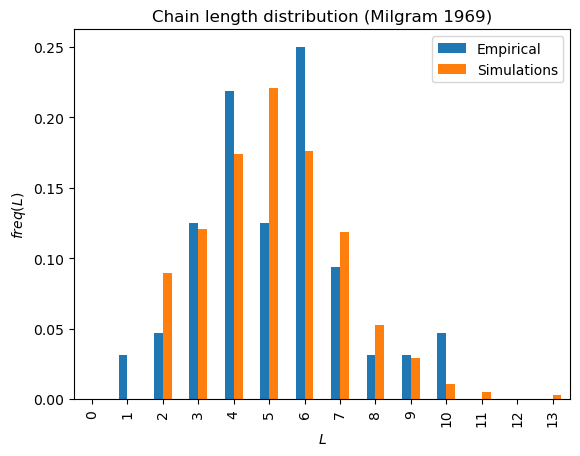

In [20]:
## Milgram ## 
# Gather output simulation
depths, sizes, apps, succs = R_milgram
depths_suc = np.array(depths)[succs]

# Trasnform chain length data into normalized distribution
milgram_sim = pd.Series(depths_suc).value_counts().sort_index()
milgram_sim /= milgram_sim.sum();

# Combine into a DataFrame
df_milgram = pd.concat([c_milgram, milgram_sim], axis=1)
df_milgram.columns = ['Empirical', 'Simulations']

avg_chain_lengths = (df_milgram.mul(df_milgram.index, axis=0)).sum()
print(f"""Average chain lengths:
 - {avg_chain_lengths.round(2).to_dict()}""")

# Plot side by side
df_milgram.plot(kind='bar')
plt.title("Chain length distribution (Milgram 1969)")
plt.xlabel('$L$')
plt.ylabel('$freq(L)$');

In [21]:
%%time
## Reproducing Dodds's 2003 experiment
np.random.seed(42)
τ = 0.06 # 1 - τ success line: these experiments should be ~near criticality
pr = bd.success_pr_at_prob_tau(P_HIRING, K_AVG, P_APPLICATION, τ) 

nsim = 500
R_dodds = perform_independent_model_simulations(
    n_simulations=nsim, 
    new_edgelist_every=nsim // 5,
    edgelist_generator=ER_GENERATOR,
    recommendation_probs=pr,
    application_probs=P_APPLICATION,
    hiring_probs=P_HIRING,
)
depths, sizes, apps, succs = R_dodds
depths_suc = np.array(depths)[succs]
sizes_suc = np.array(sizes)[succs]

print(f"Recommendation probability: {pr:.3f}%")
print(f"Success rate: {sum(succs)/len(succs)*100:.1f}%")
print(f"Average chain length: {np.mean(depths_suc):.2f}")
print(f"Max chain length: {np.max(depths_suc):.2f}");

Recommendation probability: 0.180%
Success rate: 92.8%
Average chain length: 4.14
Max chain length: 9.00
CPU times: user 6.9 s, sys: 368 ms, total: 7.27 s
Wall time: 7.31 s


Average chain lengths:
 - {'Empirical': 4.15, 'Simulations': 4.14}


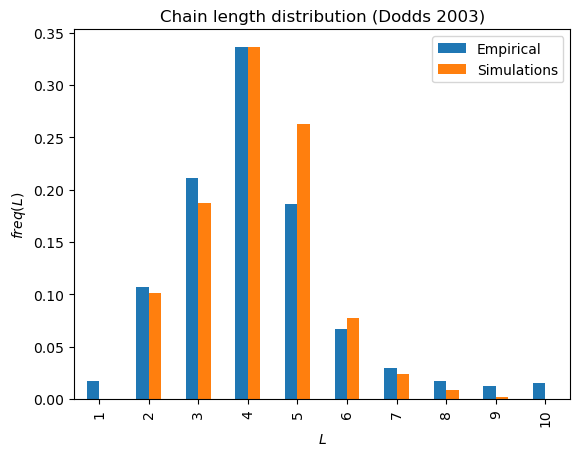

In [22]:
# Gather output simulation
depths, sizes, apps, succs = R_dodds
depths_suc = np.array(depths)[succs]

# Trasnform chain length data into normalized distribution
dodds_sim = pd.Series(depths_suc).value_counts().sort_index()
dodds_sim /= dodds_sim.sum();

# Combine into a DataFrame
# df = pd.concat([c_dodds, dodds_sim], axis=1)
df_dodds = pd.concat([c_dodds, dodds_sim], axis=1)
df_dodds.columns = ['Empirical', 'Simulations']

# Print average chain lengths
avg_chain_lengths = (df_dodds.mul(df_dodds.index, axis=0)).sum()
print(f"""Average chain lengths:
 - {avg_chain_lengths.round(2).to_dict()}""")

# Plot side by side
df_dodds.plot(kind='bar')
plt.title("Chain length distribution (Dodds 2003)")
plt.xlabel('$L$')
plt.ylabel('$freq(L)$');

In [23]:
SAVE = False
if SAVE:
    ## Save individual model realizations
    fn_prefix = 'depths-sizes-applications-successes-'
    fn_suffix = f'n_nodes={N_NODES}-k_avg={K_AVG}-pa={pa}-ph={ph}-tau={τ}.npy'
    fn_milgram = os.path.join(PATH, 'milgram_and_dodds', 'ER', 'Milgram-' + fn_prefix + fn_suffix)
    fn_dodds = os.path.join(PATH, 'milgram_and_dodds', 'ER', 'Dodds-' + fn_prefix + fn_suffix)
    save_experiment(fn_milgram, R_milgram)
    save_experiment(fn_dodds, R_dodds)
    
    # Save distributions (empirical and simulated)
    fn_df_milgram = os.path.join(PATH, 'milgram_and_dodds', 'ER', 'Milgram-depth_distribution-emprical_vs_simulation.csv')
    fn_df_dodds = os.path.join(PATH, 'milgram_and_dodds', 'ER', 'Dodds-depth_distribution-emprical_vs_simulation.csv')
    df_milgram.fillna(0).to_csv(fn_df_milgram)
    df_dodds.fillna(0).to_csv(fn_df_dodds)

These are the distributions we got when we ran the experiments for the paper
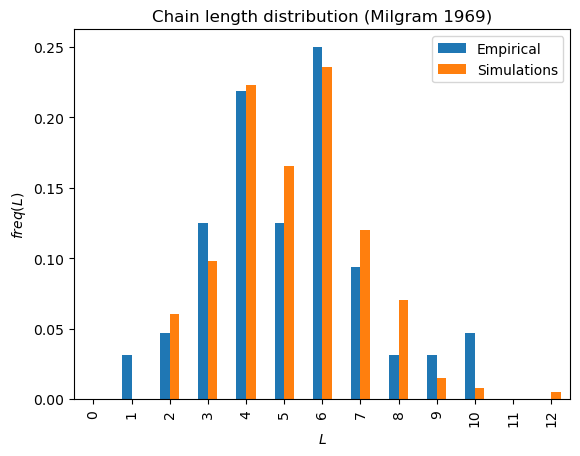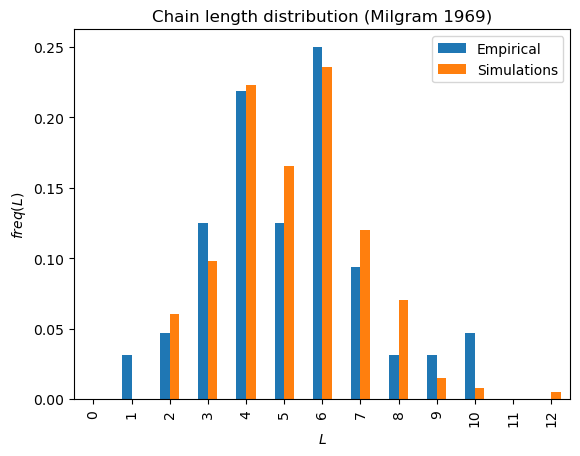
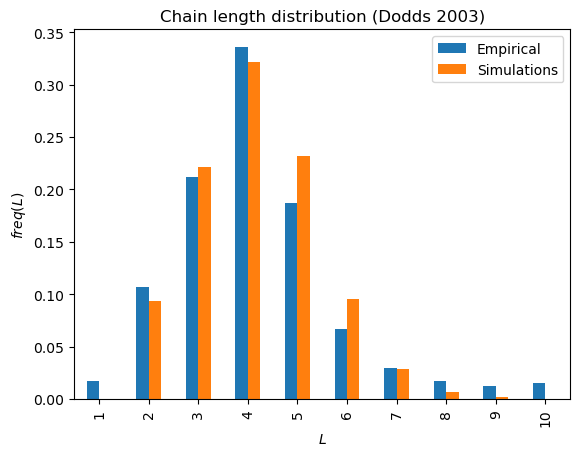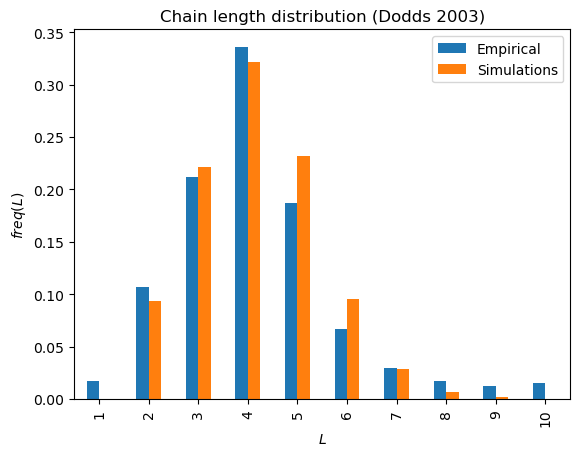